# **we are going to go through the popular Titanic dataset and try to predict whether a person survived the shipwreck. Also understand other points.**

The Goal: Predict whether a passenger survived or not. 0 for not surviving, 1 for surviving

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('/content/train.csv')

In [37]:
df.shape

(891, 12)

In [38]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
# How does the data look like?
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
247,248,1,2,"Hamalainen, Mrs. William (Anna)",female,24.0,0,2,250649,14.50,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.00,B94,S
545,546,0,1,"Nicholson, Mr. Arthur Ernest",male,64.0,0,0,693,26.00,NaN,S
648,649,0,3,"Willey, Mr. Edward",male,NaN,0,0,S.O./P.P. 751,7.55,NaN,S
428,429,0,3,"Flynn, Mr. James",male,NaN,0,0,364851,7.75,NaN,Q


In [12]:
# What is the data type of cols?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Replace the all null values from zero
# also remove cabin column because of lot of null values
# change data type of Age into Int

In [13]:
# Are there any missing values?
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
# Are there any duplicate values?
df.duplicated().sum()

0

In [15]:
df.drop(['Cabin'],axis=1,inplace=True)

In [16]:
df['Age'].fillna(value=0,inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [17]:
df[['Age']] = df[['Age']].astype(int)
print(df.dtypes['Age'])

int64


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 76.7+ KB


In [19]:
# How does the data look mathematically?
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,23.783389,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,17.597344,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,6.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
# How is the correlation between cols?
df.corr()['Survived']

<ipython-input-20-bb4704cc7b74>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Survived']


PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age            0.010508
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

**In the correlation:**

Clearly we saw there no correlation of passenger id,Age & Patch

but Pclass and Fare have good correlation with survived


# **Firstly focus on catergorical data set**

0    549
1    342
Name: Survived, dtype: int64

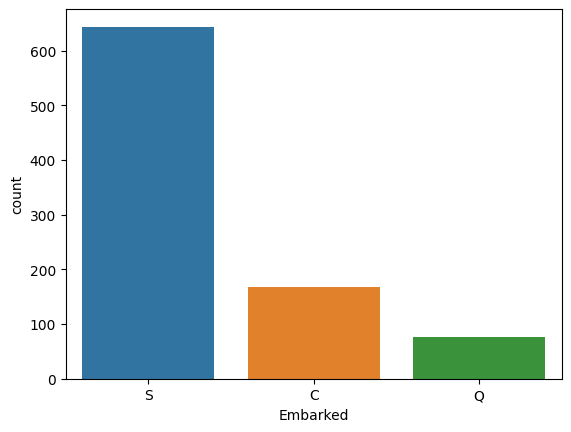

In [21]:
# Countplot (Bar Chart)
sns.countplot(data=df, x='Embarked')
df['Survived'].value_counts()

In Bar chart,
we saw the number of person
Died    549
Survied   342

3    491
1    216
2    184
Name: Pclass, dtype: int64

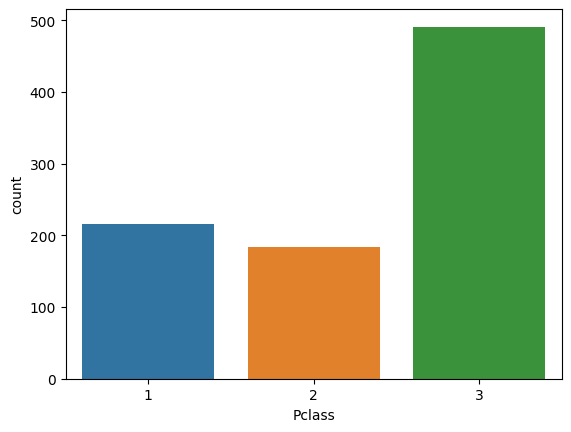

In [22]:
sns.countplot(data=df,x='Pclass')
df['Pclass'].value_counts()

<Axes: ylabel='Embarked'>

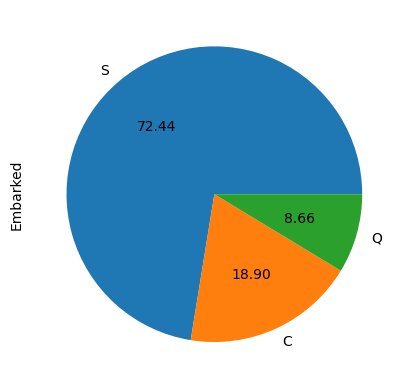

In [23]:
# using Pie Chart to check Percentage
df['Embarked'].value_counts().plot(kind='pie',autopct ='%.2f')

<Axes: ylabel='Pclass'>

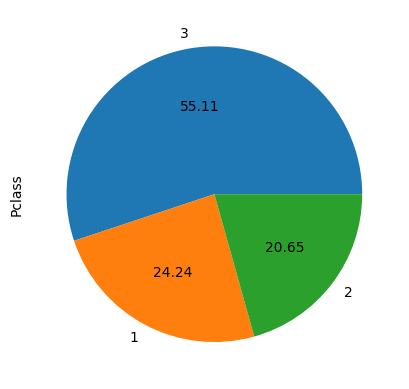

In [24]:
df['Pclass'].value_counts().plot(kind='pie',autopct ='%.2f')

# **Numerical Data Plot**

# 1. Histogram

(array([227.,  33., 164., 181., 123.,  74.,  50.,  26.,  11.,   2.]),
 array([ 0.,  8., 16., 24., 32., 40., 48., 56., 64., 72., 80.]),
 <BarContainer object of 10 artists>)

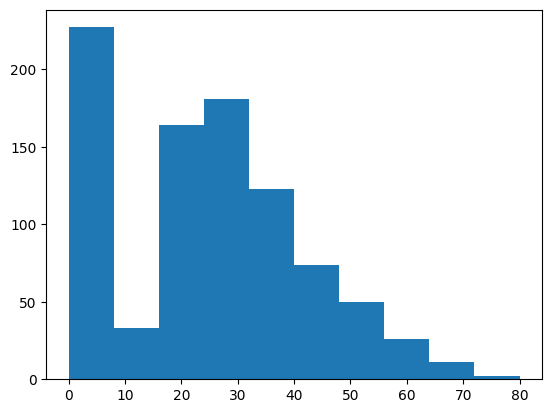

In [25]:
plt.hist(df['Age'],bins = 10)

(array([678., 118.,   0.,  80.,   0.,   5.,   4.,   0.,   5.,   1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

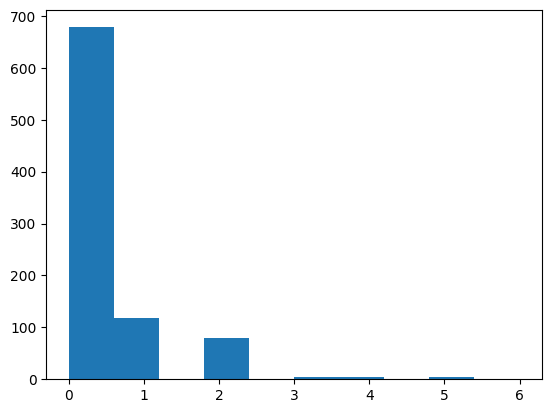

In [26]:
plt.hist(df['Parch'])

# 2.Distplot (PDF)

<ipython-input-27-0fafe04ea3f6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

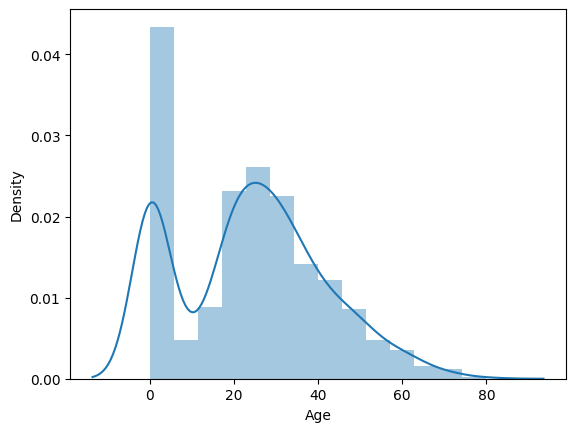

In [27]:
sns.distplot(df['Age'])

# 3. BoxPlOt

<Axes: >

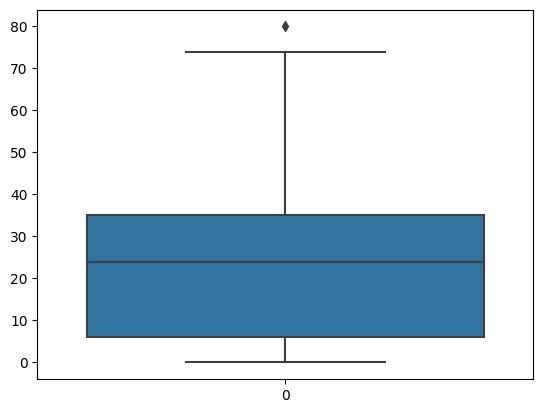

In [28]:
sns.boxplot(df['Age'])

In [29]:
df['Age'].min()

0

In [30]:
df['Age'].max()

80

In [31]:
df['Age'].median()

24.0